In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Healthcare Providers.csv")

In [5]:
print("First 10 rows of the dataset:")
df.tail()

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
4478,570902,1053580696,WILT,MARK,T,DPM,M,I,401 ROGERS ST,NaN,...,10060,Drainage of abscess,N,22,19,22,117.82,128,76.093636364,77.423636364
4479,4191525,1427130152,HYSLOP,WILLIAM,NaN,MD,M,I,101 MANNING DR,NaN,...,71020,"X-ray of chest, 2 views, front and side",N,14,14,14,10.83,33,7.8835714286,8.1178571429
4480,541535,1053407619,FLESHER,THOMAS,H,M.D.,M,I,1210 W 18TH ST STE G01,NaN,...,99203,"New patient office or other outpatient visit, ...",N,25,25,25,97.58,200,60.6388,72.756
4481,7734722,1780690073,THRIFTY PAYLESS INC,NaN,NaN,NaN,NaN,O,315 WEST WASHINGTON AVENUE,NaN,...,90686,Vaccine for influenza for administration into ...,Y,11,11,11,19.03,19.03,18.65,18.65
4482,3111709,1316908072,SCHWARTZ,MARTIN,A,MD,M,I,1711 W TEMPLE ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(4483, 27)

In [7]:
print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483 entries, 0 to 4482
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     4483 non-null   int64  
 1   National Provider Identifier                              4483 non-null   int64  
 2   Last Name/Organization Name of the Provider               4483 non-null   object 
 3   First Name of the Provider                                4272 non-null   object 
 4   Middle Initial of the Provider                            3140 non-null   object 
 5   Credentials of the Provider                               4141 non-null   object 
 6   Gender of the Provider                                    4272 non-null   object 
 7   Entity Type of the Provider                               4483 non-null   object 
 8

In [8]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   4.483000e+03                  4.483000e+03   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.935562e+06                  1.500971e+09   
std     2.851556e+06                  2.885931e+08   
min     3.900000e+02                  1.003002e+09   
25%     2.483508e+06                  1.255337e+09   
50%     4.984352e+06                  1.508852e+09   
75%     7.422340e+06                  1.750370e+09   
max     9.843709e+06                  1.992968e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                         4483                       4272   
unique                                        3590                       1640   
top                                          PATEL                    M

In [9]:
print("\nMissing values and their percentages:")
missing_values=df.isnull().sum()
missing_percentages=(missing_values/len(df))*100
missing_data=pd.DataFrame({
    'Missing Values':missing_values,
    'Percentage':missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0    0.000000
National Provider Identifier                                     0    0.000000
Last Name/Organization Name of the Provider                      0    0.000000
First Name of the Provider                                     211    4.706670
Middle Initial of the Provider                                1343   29.957618
Credentials of the Provider                                    342    7.628820
Gender of the Provider                                         211    4.706670
Entity Type of the Provider                                      0    0.000000
Street Address 1 of the Provider                                 0    0.000000
Street Address 2 of the Provider                              2696   60.138300
City of the Provider                                             0    0.000000
Zip Code of t

In [10]:
cleaned_df=df.dropna(thresh=len(df)*0.5,axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(4483, 26)


In [11]:
df = df.dropna(subset=['Gender of the Provider', 'Provider Type'])

# Example: Financial metrics columns might be strings; convert them to numeric
financial_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

In [12]:
for col in financial_columns:
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)

# Count the distribution of provider types
provider_type_counts = df['Provider Type'].value_counts()

In [13]:
print("\nData cleaning completed.")


Data cleaning completed.


In [14]:
# Identify the most and least common provider types
most_common = provider_type_counts.idxmax()
least_common = provider_type_counts.idxmin()
print(f"\nMost Common Provider Type: {most_common} ({provider_type_counts.max()} instances)")
print(f"Least Common Provider Type: {least_common} ({provider_type_counts.min()} instances)")


Most Common Provider Type: Diagnostic Radiology (557 instances)
Least Common Provider Type: Sleep Medicine (1 instances)


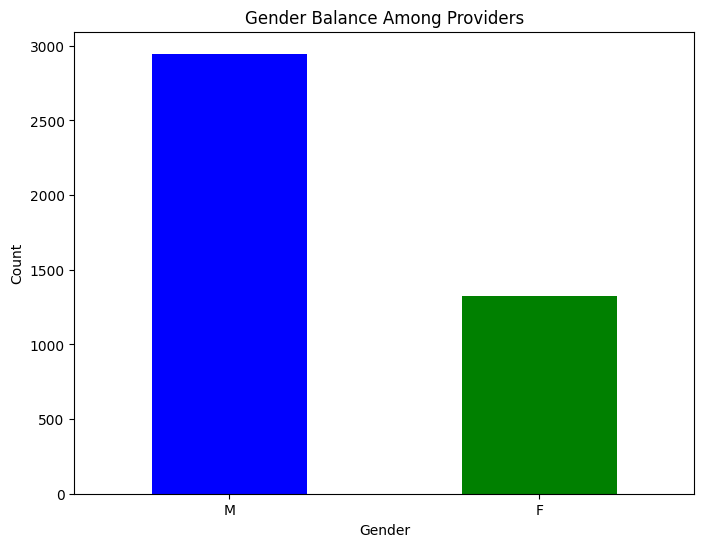

In [16]:
# Gender balance analysis
gender_counts = df['Gender of the Provider'].value_counts()

# Plotting the Bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Gender Balance Among Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [18]:
# Count the number of providers in each state
state_counts = df['State Code of the Provider'].value_counts()

# Select the top 10 states with the most providers
top_states = state_counts.head(10)

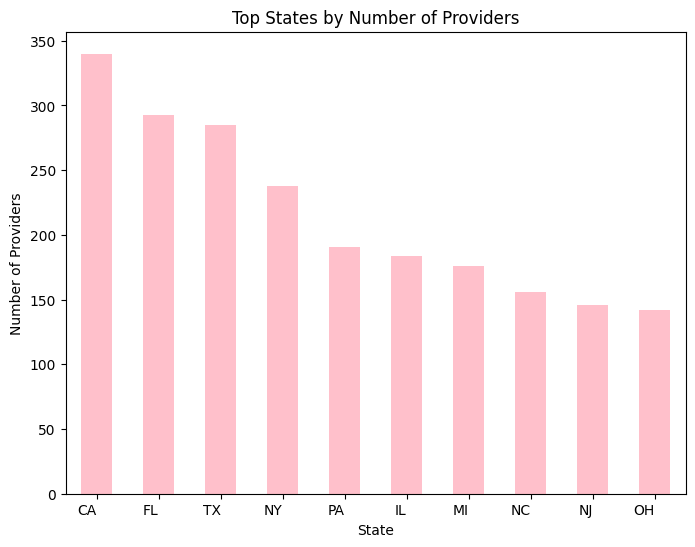

In [19]:
# 2.)Plotting the Bar chart for top states by number of providers
plt.figure(figsize=(8, 6))
top_states.plot(kind='bar', color='pink')
plt.title('Top States by Number of Providers')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0, ha='right')
plt.show()

In [20]:
# Display the top states and their provider counts
print("\nTop States by Number of Providers:")
print(top_states)


Top States by Number of Providers:
State Code of the Provider
CA    340
FL    293
TX    285
NY    238
PA    191
IL    184
MI    176
NC    156
NJ    146
OH    142
Name: count, dtype: int64


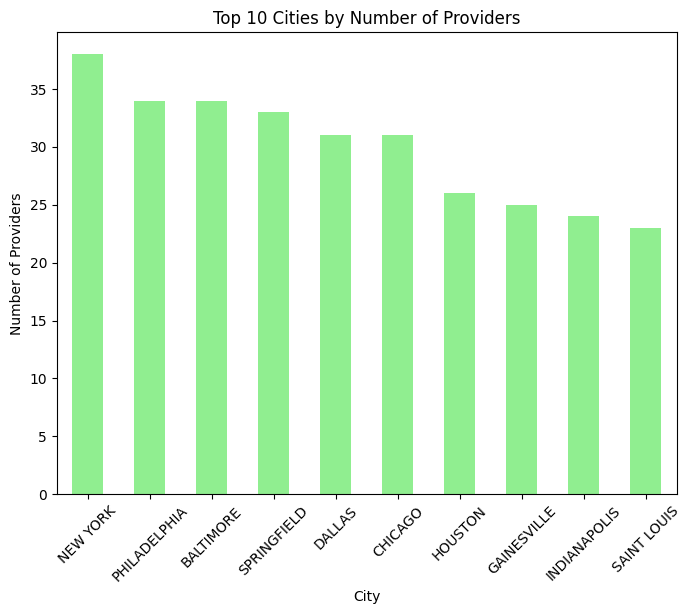

In [24]:
city_counts = df['City of the Provider'].value_counts()

# 3.)Plotting a bar chart for cities with the most active healthcare providers
top_cities = city_counts.head(10)
plt.figure(figsize=(8, 6))
top_cities.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Number of Providers')
plt.xlabel('City')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45)
plt.show()

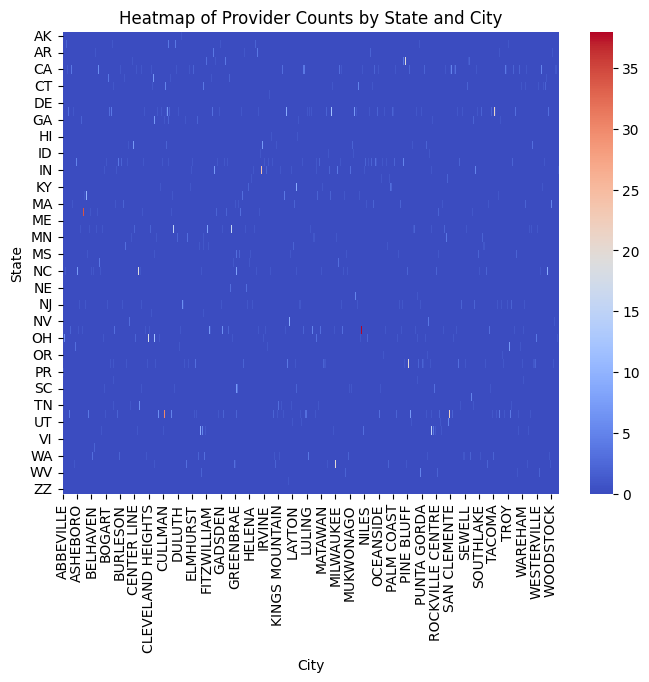

In [23]:
# Preparing a pivot table for heatmap
state_city_counts = df.groupby(['State Code of the Provider', 'City of the Provider']).size().unstack(fill_value=0)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(state_city_counts, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Provider Counts by State and City')
plt.xlabel('City')
plt.ylabel('State')
plt.show()

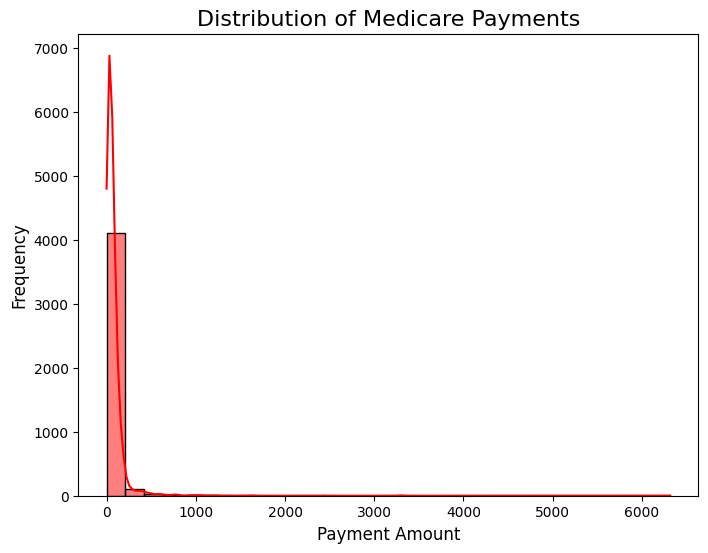

In [25]:
# Plotting bar char of Medicare Payments with a different color
plt.figure(figsize=(8, 6))
sns.histplot(df['Average Medicare Payment Amount'], bins=30, kde=True, color='red')
plt.title('Distribution of Medicare Payments', fontsize=16)
plt.xlabel('Payment Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [26]:
# Generate summary statistics for these column
summary_stats = df[financial_columns].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Average Medicare Allowed Amount  Average Submitted Charge Amount  \
count                      4271.000000                      4271.000000   
mean                         98.370919                       341.687745   
std                         210.245459                       905.640839   
min                           0.023652                         0.130000   
25%                          25.558000                        62.000000   
50%                          67.890000                       149.968914   
75%                         112.090493                       300.000000   
max                        8057.868929                     29537.500000   

       Average Medicare Payment Amount  Average Medicare Standardized Amount  
count                      4271.000000                           4271.000000  
mean                         74.520466                             74.768955  
std                         164.418710                            